In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
new_df=df.sample(50000,random_state=42)

In [5]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [6]:
new_df['is_duplicate'].value_counts()

0    31547
1    18453
Name: is_duplicate, dtype: int64

In [7]:
def preprocess(q):
    
    q=str(q).lower().strip()
    
    #replace certain specail character with there string equivalent
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    #replace [math] from the words
    q=q.replace('[math]','')
    
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    
    contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted=[]
    
    for word in q.split():
        if word in contractions:
            word=contractions[word]
            
        q_decontracted.append(word)
        
    q=" ".join(q_decontracted)
    q=q.replace("'ve'"," have")
    q=q.replace("n't"," not")
    q=q.replace("'re'"," are")
    q=q.replace("'ll"," will")
    
    #removing html tags
    q=BeautifulSoup(q)
    q=q.get_text()
    
    pattern=re.compile('\W')
    q=re.sub(pattern," ",q).strip()
    
    return q

    

In [8]:
preprocess("Hii! I'm Dipayan Majumder, what's about u ?? <br></br> ")

'hii  i m dipayan majumder  what has   what is about u'

In [9]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


In [11]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [12]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28


In [13]:
new_df['q1_num_word']=new_df['question1'].apply(lambda x:len(x.split(" ")))
new_df['q2_num_word']=new_df['question2'].apply(lambda x:len(x.split(" ")))



In [14]:
def common_word(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    
    return len(w1 & w2)



def total_word(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    
    return (len(w1)+len(w2))



In [15]:
new_df['word_common']=new_df.apply(common_word,axis=1)
new_df['total_word']=new_df.apply(total_word,axis=1)

In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2,25
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16


In [17]:
new_df['word_share']=round(new_df['word_common']/new_df['total_word'],2)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16,0.44
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20,0.30
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,2,25,0.08
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16,0.38
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16,0.25


In [18]:
# ADVANCED FEATURE ENGINEERING

from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1=row['question1']
    q2=row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORD=stopwords.words('english')
    
    token_features=[0.0]*8
    
    #converting the sentence into token
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #get the non stopwords in the Questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORD])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORD])
    
    #get the stopwords in Questions
    
    q1_stops=set([word for word in q1_tokens if word in STOP_WORD])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORD])
    
    #get the common Question pair from 
    common_word_count=len(q1_words.intersection(q2_words))
    
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+ SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7]= int(q1_tokens[0]==q2_tokens[0])
    
    return token_features

    
    

In [19]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,total_word,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,20,0.30,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,25,0.08,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,16,0.38,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,16,0.25,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0


In [21]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*4
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    
    return length_features
    

In [22]:
q1 = 'how do i play pokémon go in korea'
q2 = 'how do i play pokémon go in china'

strs = list(distance.lcsubstrings(q1, q2))

len(strs[0])

28

In [23]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))



In [24]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,1.0,2.0,10.0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,0.0,8.0,12.0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,1.0,2.0,8.0
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,1.0,2.0,8.0


FUZZY FEATURE

In [25]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features



In [26]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.874989,0.874989,0.0,1.0,0.0,8.0,88,88,81,90
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.666659,0.545450,0.0,1.0,2.0,10.0,73,72,73,73
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,95,44,17,8,...,0.249997,0.124999,0.0,0.0,8.0,12.0,35,43,36,24
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.857131,0.666659,0.0,1.0,2.0,8.0,72,67,89,96
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.571420,0.444440,0.0,1.0,2.0,8.0,68,61,71,81


In [28]:
new_df.shape

(50000, 27)

ANALYSIS THE NEW FEATURES

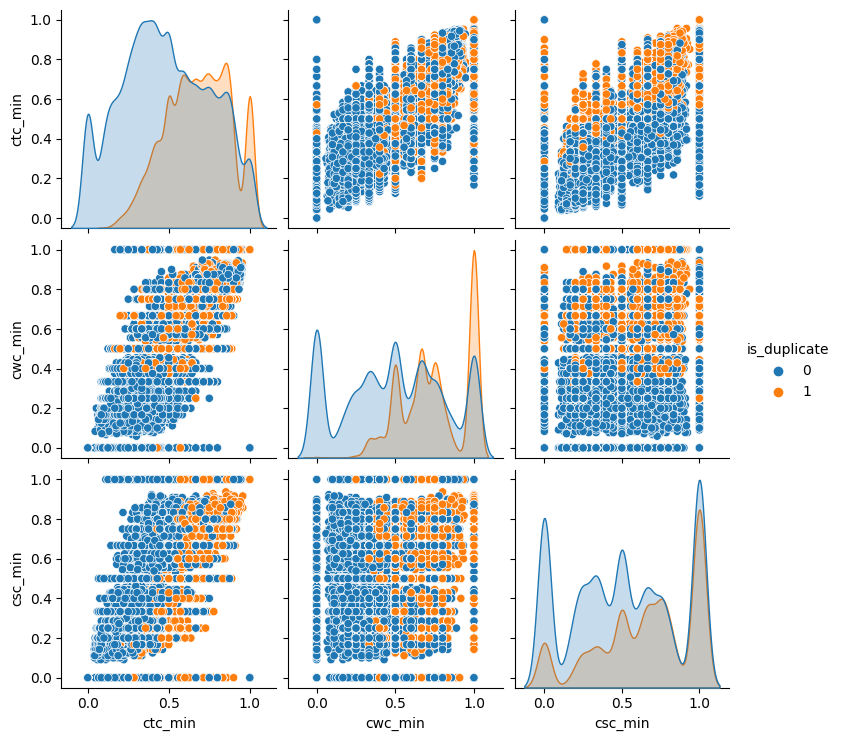

In [29]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

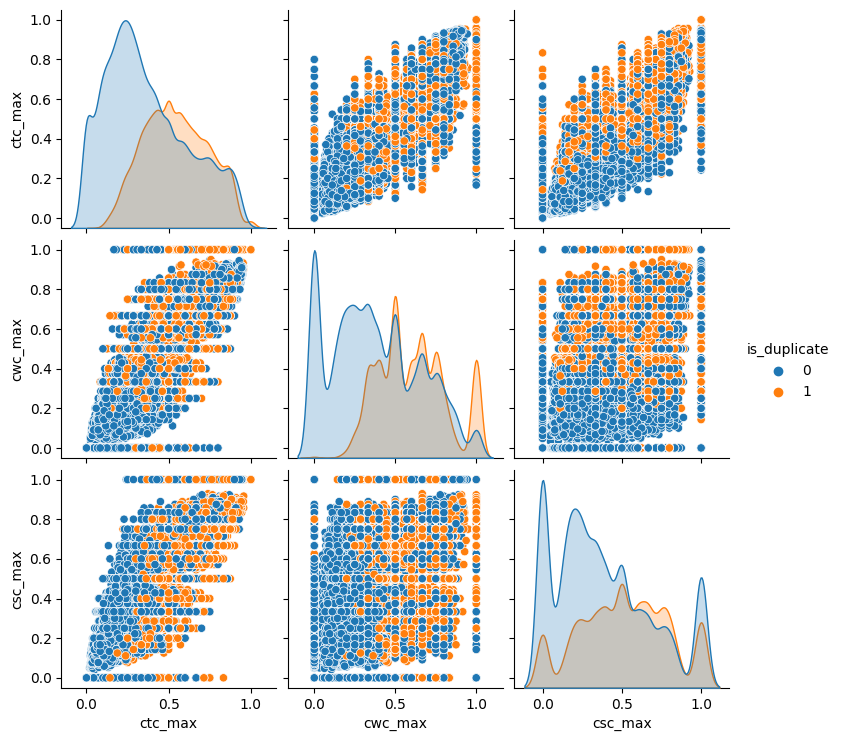

In [30]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

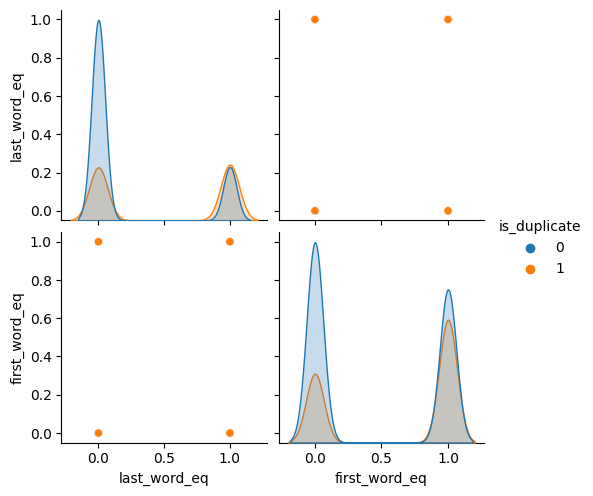

In [31]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

In [32]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' ]])

y = new_df['is_duplicate'].values

In [33]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.121s...
[t-SNE] Computed neighbors for 50000 samples in 10.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

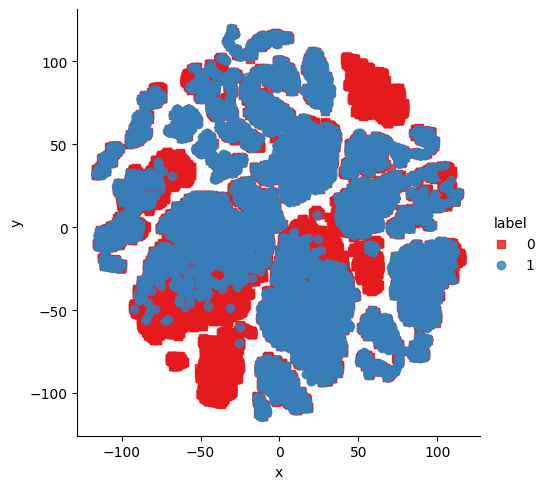

In [34]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [35]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...
70497,which is more advisable and better material fo...,what is the best server setup for buddypress
226567,how do i improve logical programming skills,how can i improve my logical skills for progra...
73186,how close we are to see 3rd world war,how close is a world war iii


In [36]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share,cwc_min,cwc_max,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0.874989,0.874989,0.0,1.0,0.0,8.0,88,88,81,90
368101,0,52,50,11,9,6,20,0.30,0.399992,0.399992,...,0.666659,0.545450,0.0,1.0,2.0,10.0,73,72,73,73
70497,0,95,44,17,8,2,25,0.08,0.000000,0.000000,...,0.249997,0.124999,0.0,0.0,8.0,12.0,35,43,36,24
226567,1,43,51,7,9,6,16,0.38,0.999975,0.999975,...,0.857131,0.666659,0.0,1.0,2.0,8.0,72,67,89,96
73186,1,37,28,9,7,4,16,0.25,0.749981,0.599988,...,0.571420,0.444440,0.0,1.0,2.0,8.0,68,61,71,81


In [37]:
final_df.shape

(50000, 22)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [39]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [40]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df.shape

(50000, 6022)

In [41]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
368101,0,52,50,11,9,6,20,0.30,0.399992,0.399992,...,0,0,0,0,0,0,0,0,0,0
70497,0,95,44,17,8,2,25,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
226567,1,43,51,7,9,6,16,0.38,0.999975,0.999975,...,0,0,0,0,0,0,0,0,0,0
73186,1,37,28,9,7,4,16,0.25,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7924

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)


0.7953

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
# for Xgboost
confusion_matrix(y_test,y_pred)

array([[5361,  960],
       [1116, 2563]], dtype=int64)

In [65]:
# Random Forest Classifier
confusion_matrix(y_test,y_pred)


array([[5372,  949],
       [1112, 2567]], dtype=int64)

In [46]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [47]:
def test_fetch_token_features(q1,q2):
    
    
    
    SAFE_DIV = 0.0001
    
    STOP_WORD=stopwords.words('english')
    
    token_features=[0.0]*8
    
    #converting the sentence into token
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #get the non stopwords in the Questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORD])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORD])
    
    #get the stopwords in Questions
    
    q1_stops=set([word for word in q1_tokens if word in STOP_WORD])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORD])
    
    #get the common Question pair from 
    common_word_count=len(q1_words.intersection(q2_words))
    
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+ SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7]= int(q1_tokens[0]==q2_tokens[0])
    
    return token_features

    

In [48]:
def test_fetch_length_features(q1,q2):
    
    
    
    length_features = [0.0]*2
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    
    return length_features
    

In [49]:
def test_fetch_fuzzy_features(q1,q2):
    

    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [50]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,21),q1_bow,q2_bow))


In [100]:
cv

CountVectorizer(max_features=3000)

In [111]:

cv.transform(['I want to go to room']).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

In [108]:
q1_arr.shape

(32, 6)

In [55]:
q1='What is the capital of India'
q2='What is the current capital of pakistan'

In [105]:
cv.fit_transform([q1]).toarray()

array([[1, 1, 1, 1, 1, 1]], dtype=int64)

In [56]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [57]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))